# Đọc dữ liệu

In [84]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [86]:
data_path = 'data/train_mode.csv'
data = pd.read_csv(data_path)

In [87]:
numeric_data = data.select_dtypes(include=['number'])

# Encoding categorical features

In [88]:
from cate_encoder import CaterEncoder

encoder = CaterEncoder()
data = encoder.fit_transform(data)

same_data = pd.read_csv(data_path)
same_data = encoder.transform(same_data)

In [89]:
print("Same" if data.compare(same_data).empty else "Diff")

Same


# Visualizing

## Hiển thị các Correlation có abs > 0.3

In [90]:
# drop Kilometer = 2e6
data = data.drop(data[data["Kilometer"] == 2e6].index)

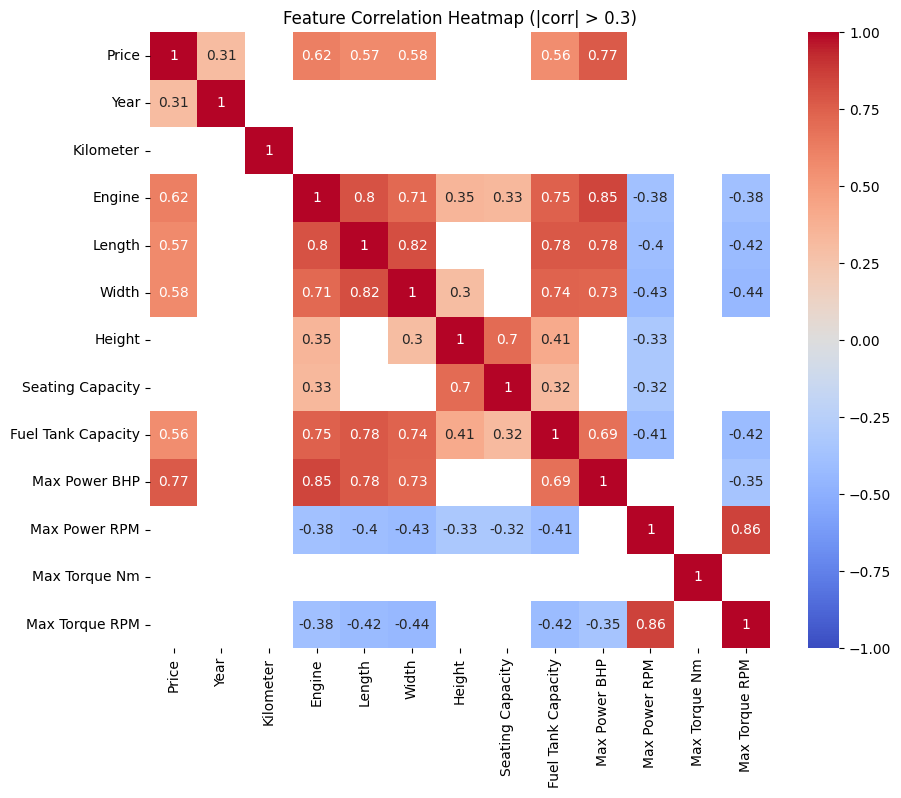

In [91]:

# Compute correlation
corr_matrix = numeric_data.corr()
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.title("Feature Correlation Heatmap (|corr| > 0.3)")
plt.show()

# Visualize từng biến với Price

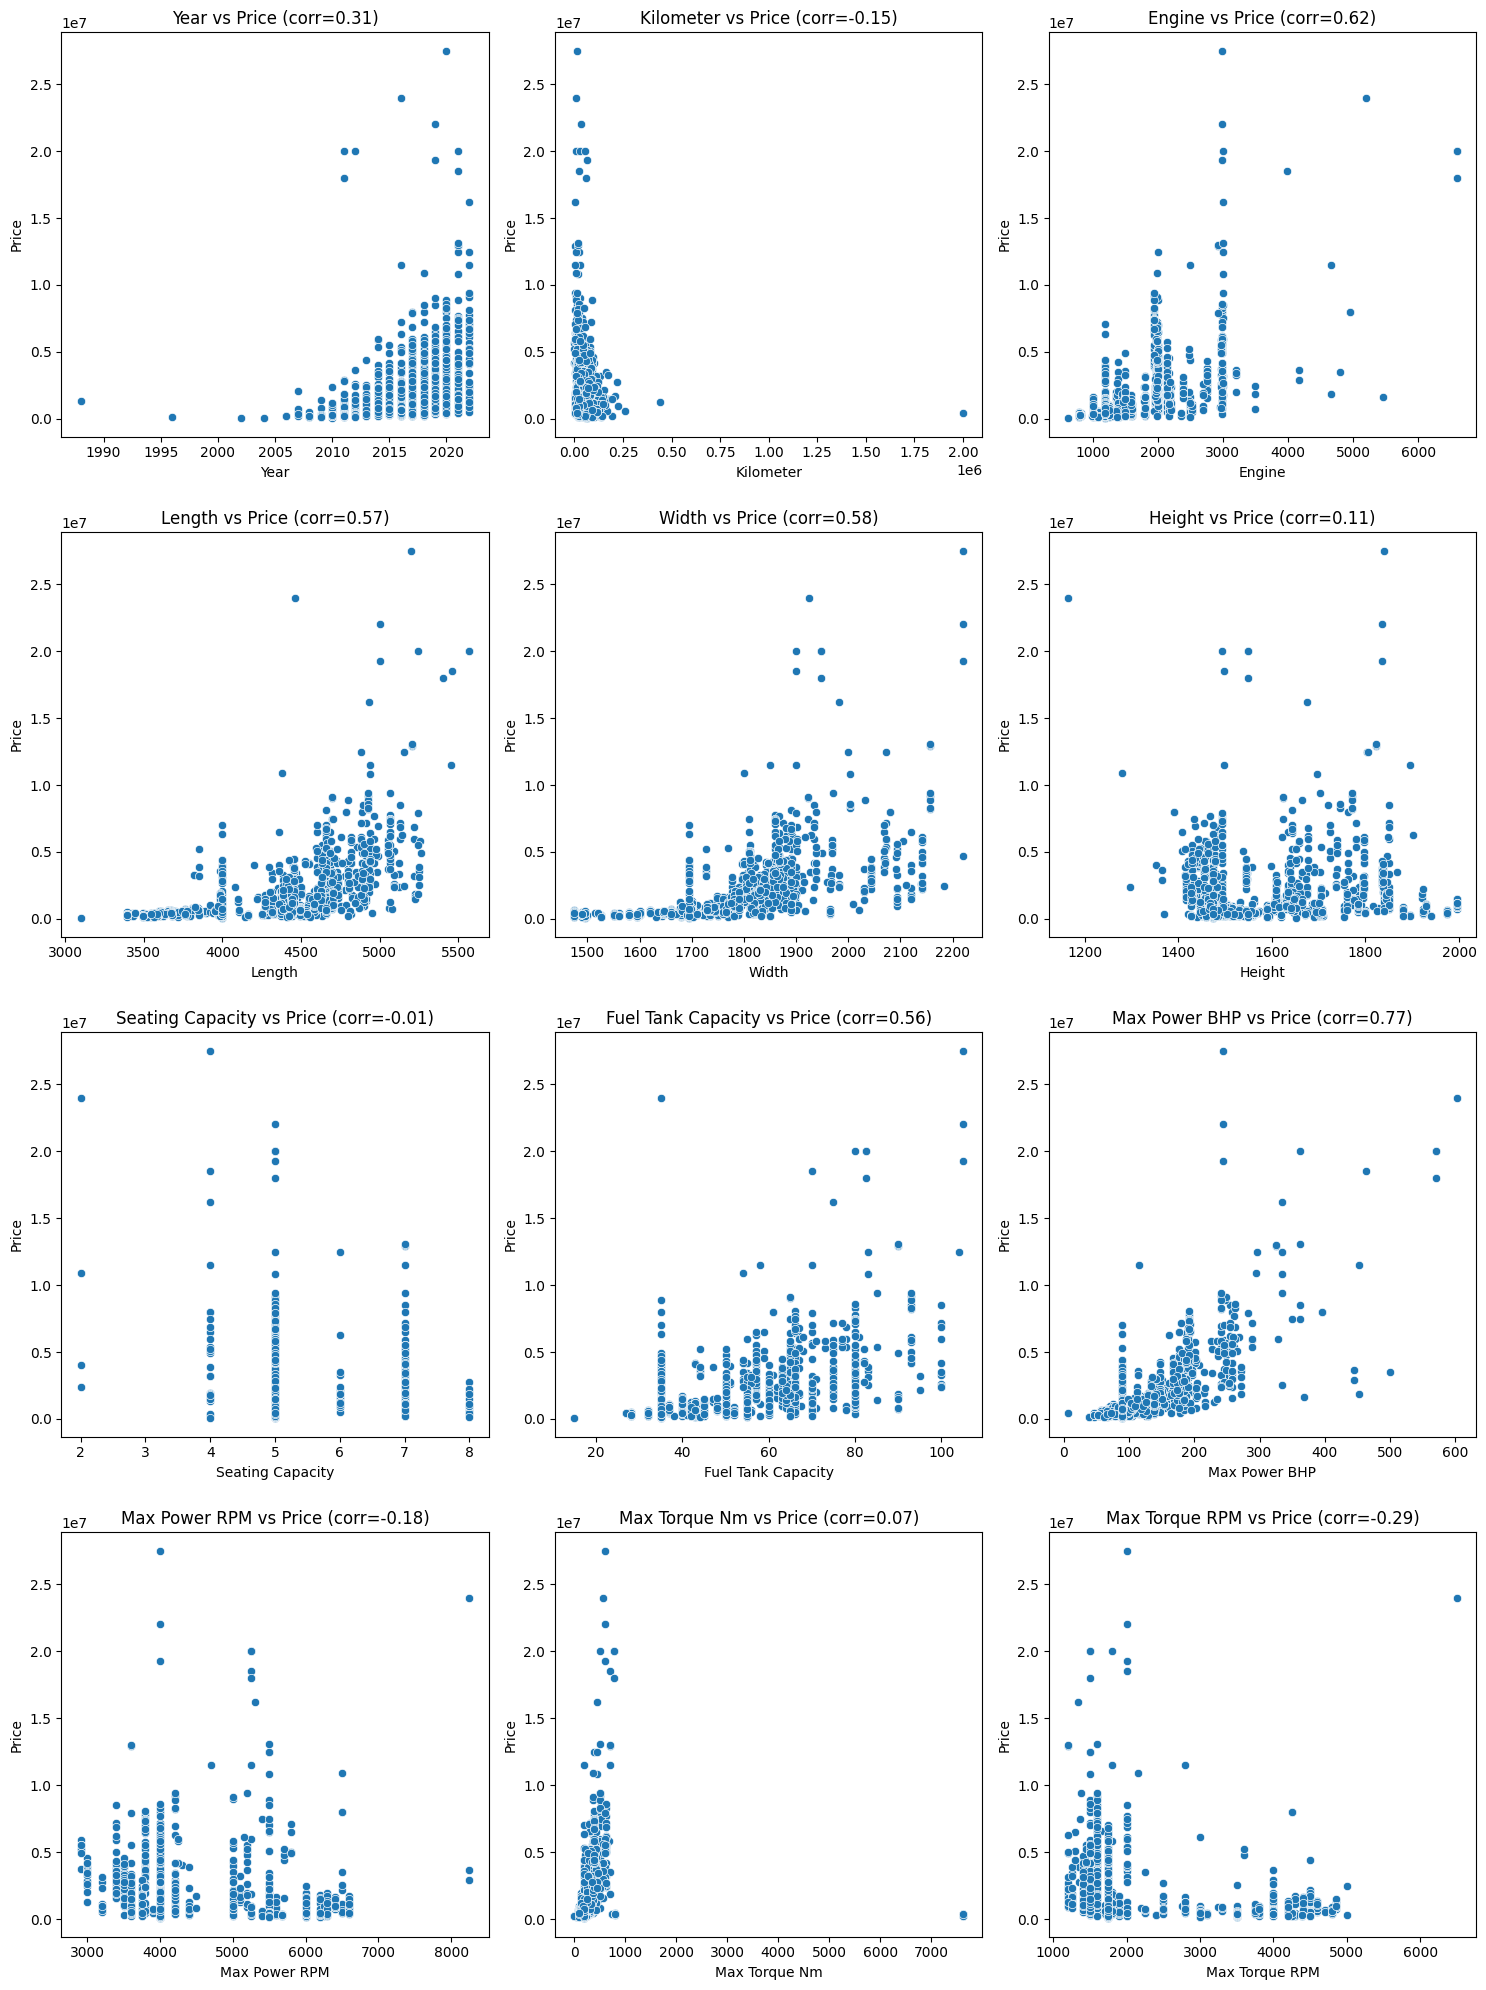

In [92]:
import math
correlations = numeric_data.corr()["Price"]
num_cols = [col for col in numeric_data.columns if col != "Price"]

num_plots = len(num_cols)
cols_per_row = 3  
num_rows = math.ceil(num_plots / cols_per_row) 

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    corr_value = correlations[col]
    sns.scatterplot(x=numeric_data[col], y=numeric_data["Price"], ax=axes[i])
    axes[i].set_title(f"{col} vs Price (corr={corr_value:.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()